**Grupo: André Elias - 3013, Thomas Chang - 3052 e Victor Hugo Santos - 3510**

**Projeto: Brasil em Dados - Análise Geral das cidades brasileiras**

**Professor: Fábricio A. Silva**

**Disciplina: CCF 425 - Introdução à Ciência dos Dados**

# Imports e Configurações

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.float_format = "{:.2f}".format # formata saída do pandas c 2 casas após a vírgula

# Leitura dos Dados

In [2]:
# planilhas estão localmente localizadas - Data_Dictionary.csv contém o dicionário dos atributos de BRAZIL_CITIES.csv

dados_cidades = pd.read_csv('BRAZIL_CITIES.csv', sep = ';')
dicionario = pd.read_csv('Data_Dictionary.csv', sep = ';')

# Verificação dos Dados

Inicialmente serão verificados: "todas as linhas ok? todas as colunas ok? data frame foi lido corretamente?"

In [3]:
print("Quantidade linhas:",len(dados_cidades), "\nQuantidade colunas:", len(dados_cidades.columns))

Quantidade linhas: 5573 
Quantidade colunas: 81


* Segundo os dados disponibilizados no kaggle, a leitura foi feita corretamente.

In [4]:
dados_cidades.head()

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.00,6876.00,0.00,2137.00,1546.00,591.00,5300.00,...,NaN,NaN,NaN,2158.00,1246.00,0.00,NaN,NaN,NaN,1.00
1,Abadia Dos Dourados,MG,0,6704.00,6704.00,0.00,2328.00,1481.00,847.00,4154.00,...,NaN,NaN,NaN,2227.00,1142.00,0.00,NaN,NaN,NaN,1.00
2,Abadiânia,GO,0,15757.00,15609.00,148.00,4655.00,3233.00,1422.00,10656.00,...,1.00,33724584.00,67091904.00,2838.00,1426.00,0.00,NaN,NaN,NaN,3.00
3,Abaeté,MG,0,22690.00,22690.00,0.00,7694.00,6667.00,1027.00,18464.00,...,2.00,44974716.00,371922572.00,6928.00,2953.00,0.00,NaN,NaN,NaN,4.00
4,Abaetetuba,PA,0,141100.00,141040.00,60.00,31061.00,19057.00,12004.00,82956.00,...,4.00,76181384.00,800078483.00,5277.00,25661.00,0.00,NaN,NaN,NaN,2.00


* Uma primeira modificação é remover colunas que não farão parte das análises direcionadas pelas perguntas elaboradas na etapa 1. Porém, pelo data frame não possuir um tamanho tão grande e sua leitura possuir um tempo computacional rápido, as colunas não serão removidas. As perguntas elaboradas, como descritas pelo professor, são de apenas direcionamento e a remoção de uma coluna agora pode ser um problema no futuro. Até que o projeto chegue ao final, todos os atributos serão mantidos, pro caso de necessidade.

In [5]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

 * Como se pode ver, pela função info(), temos uma quantidade considerável de valores nulos para:
* REGIAO_TUR: Região da categoria de turismo
* CATEGORIA_TUR: Categoria de Turismo
* MUN_EXPENDIT: Despesas municipais - em reais
* HOTELS: Número de Hoteis
* BEDS: Número total de camas de hotel
* Pr_Agencies, Pr_Bank e Pr_Assets: Número total de agências, bancos e ativos (em reais) privados
* Pu_Agencies, Pu_Bank e Pu_Assets: Número total de agências, bancos e ativos (em reais) públicos
* UBER: Cidade possui uber (1) ou não (0)
* MAC: Número total de McDonald's
* WAL-MART: Número total de Walmart's

* Vale lembrar que, além dos atributos listados acima, alguns outros atributos também possuem valores nulos, porém a quantidade está muito pequena e o grupo não achou necessário tratar, por enquanto.

# Preparando Dados

* Os atributos 'REGIAO_TUR' e 'CATEGORIA_TUR' receberão a string 'Nenhum' em campos nulos, que representam, justamente, a ausência de turismo naquela determinada região. Pela string 'Nenhum', será mais fácil e dinâmico de tratar dados futuramente em alguma possível análise.

In [6]:
dados_cidades['REGIAO_TUR'].fillna('Nenhum', inplace = True)
dados_cidades['CATEGORIA_TUR'].fillna('Nenhum', inplace = True)

* 'MUN_EXPENDIT' em campos nulos receberá a mediana de todos os outros valores da coluna. Inicialmente foi pensado em colocar 0 em tais campos, porém o valor 0 poderia enviezar os dados, pelo campo se tratar de um valor em reais e por 0 ser um valor extremo. Colocar a média também pode não ser uma ideia boa, pois o desvio padrão está relativamente alto, então o grupo teve a decisão de colocar a mediana. Colocando a mediana dos outros valores, a chance daquele determinado valor variar muito a análise é pequena.

In [7]:
dados_cidades['MUN_EXPENDIT'].describe()

count          4081.00
mean      104303251.55
std       864577296.23
min         1420804.00
25%        15734674.00
50%        27460018.00
75%        56664706.00
max     45772497944.00
Name: MUN_EXPENDIT, dtype: float64

In [8]:
dados_cidades['MUN_EXPENDIT'].fillna(dados_cidades['MUN_EXPENDIT'].quantile(.50), inplace = True)

* Para os atributos 'HOTELS', 'BEDS', 'UBER', 'MAC' e 'WAL-MART' o valor nulo indica ausência daquele atributo naquela cidade, então, colocamos o valor 0 em tais campos.

In [9]:
dados_cidades['HOTELS'].fillna(0, inplace = True)
dados_cidades['BEDS'].fillna(0, inplace = True)
dados_cidades['UBER'].fillna(0, inplace = True)
dados_cidades['MAC'].fillna(0, inplace = True)
dados_cidades['WAL-MART'].fillna(0, inplace = True)

* Quanto às instituições bancárias e quantidade de ativos, para as instituições, o valor 0 será colocado pois indica ausência e para os ativos ('Pr_Assets' e 'Pu_Assets') será colocado a mediana pelo mesmo motivo de ter sido colocado a mediana em 'MUN_EXPENDIT', por se tratar de dinheiro e o valor 0 ser capaz de enviezar a análise.

In [10]:
dados_cidades['Pr_Assets'].describe()

count             3342.00
mean        9180011950.57
std       358579710201.26
min                  0.00
25%                  0.00
50%           32310319.50
75%          114833280.75
max     19470765412654.00
Name: Pr_Assets, dtype: float64

In [11]:
dados_cidades['Pu_Assets'].describe()

count            3342.00
mean       6005096114.89
std      150382864059.44
min                 0.00
25%          40470704.00
50%         133912429.00
75%         496960499.75
max     8016164488595.00
Name: Pu_Assets, dtype: float64

In [12]:
dados_cidades['Pr_Agencies'].fillna(0, inplace = True)
dados_cidades['Pu_Agencies'].fillna(0, inplace = True)
dados_cidades['Pr_Bank'].fillna(0, inplace = True)
dados_cidades['Pu_Bank'].fillna(0, inplace = True)
dados_cidades['Pr_Assets'].fillna(dados_cidades['Pr_Assets'].quantile(.50), inplace = True)
dados_cidades['Pu_Assets'].fillna(dados_cidades['Pu_Assets'].quantile(.50), inplace = True)

* Verificando o que temos:

In [13]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5573 non-null   object 
 1   STATE                   5573 non-null   object 
 2   CAPITAL                 5573 non-null   int64  
 3   IBGE_RES_POP            5565 non-null   float64
 4   IBGE_RES_POP_BRAS       5565 non-null   float64
 5   IBGE_RES_POP_ESTR       5565 non-null   float64
 6   IBGE_DU                 5563 non-null   float64
 7   IBGE_DU_URBAN           5563 non-null   float64
 8   IBGE_DU_RURAL           5492 non-null   float64
 9   IBGE_POP                5565 non-null   float64
 10  IBGE_1                  5565 non-null   float64
 11  IBGE_1-4                5565 non-null   float64
 12  IBGE_5-9                5565 non-null   float64
 13  IBGE_10-14              5565 non-null   float64
 14  IBGE_15-59              5565 non-null   

* A maioria dos campos nulos foram preenchidos e, portanto, os restantes, que é uma quantidade extremamente pequena, será removida a linha da tabela que os contenha, para evitar futuros problemas. O grupo acredita que a remoção de poucas cidades não atrapalhará na análise, pela quantidade restante de cidades.

In [14]:
dados_cidades.dropna(inplace = True)

* Mais uma verificação:

In [15]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5572
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5368 non-null   object 
 1   STATE                   5368 non-null   object 
 2   CAPITAL                 5368 non-null   int64  
 3   IBGE_RES_POP            5368 non-null   float64
 4   IBGE_RES_POP_BRAS       5368 non-null   float64
 5   IBGE_RES_POP_ESTR       5368 non-null   float64
 6   IBGE_DU                 5368 non-null   float64
 7   IBGE_DU_URBAN           5368 non-null   float64
 8   IBGE_DU_RURAL           5368 non-null   float64
 9   IBGE_POP                5368 non-null   float64
 10  IBGE_1                  5368 non-null   float64
 11  IBGE_1-4                5368 non-null   float64
 12  IBGE_5-9                5368 non-null   float64
 13  IBGE_10-14              5368 non-null   float64
 14  IBGE_15-59              5368 non-null   

In [16]:
#Precisamos tirar a vírgula dos números para fazer a conversão para float
dados_cidades['AREA'] = dados_cidades['AREA'].replace({',':''}, regex=True)

In [17]:
dados_cidades['AREA'] = pd.to_numeric(dados_cidades['AREA'])

In [18]:
dados_cidades.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,IBGE_1-4,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
count,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,...,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00,5368.00
mean,0.00,29668.47,29610.88,57.59,8834.13,7376.19,1457.94,23361.14,330.73,1334.20,...,0.94,3901865162.33,3190605977.33,8184.62,4478.31,4.67,0.02,0.09,0.03,1.99
std,0.06,175988.76,174486.00,1650.60,55340.76,54811.49,1690.13,162886.53,2088.26,8296.41,...,1.06,265784541280.77,117202658337.02,84268.80,19487.76,50.28,0.14,1.89,0.41,3.84
min,0.00,805.00,805.00,0.00,239.00,60.00,3.00,174.00,0.00,5.00,...,0.00,0.00,0.00,2.00,4.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,5217.00,5211.75,0.00,1571.75,874.00,484.00,2797.00,38.00,158.00,...,0.00,20116157.75,84316569.75,610.50,588.00,0.00,0.00,0.00,0.00,1.00
50%,0.00,10879.50,10876.50,0.00,3144.00,1827.00,931.00,6136.00,91.00,373.00,...,1.00,32310319.50,133912429.00,1429.50,1273.00,0.00,0.00,0.00,0.00,1.00
75%,0.00,22763.00,22732.50,10.00,6550.00,4457.00,1830.25,14893.50,226.00,921.25,...,2.00,46170294.50,191374343.50,3927.00,3177.50,1.00,0.00,0.00,0.00,2.00
max,1.00,11253503.00,11133776.00,119727.00,3576148.00,3548433.00,33809.00,10463636.00,129464.00,514794.00,...,8.00,19470765412654.00,8016164488595.00,5740995.00,1134570.00,3236.00,1.00,130.00,26.00,225.00


# Ficamos com 5368 cidades com todos os dados preenchidos

# Analise Exploratória com intuito de responder os questionamentos propostos

1 - Quais cidades possuem maior IDH?

In [19]:
dados_cidades.sort_values(by=['IDHM'], ascending=False)[['CITY', 'CAPITAL', 'IDHM']].head(10)

,CITY,CAPITAL,IDHM
1812,Florianópolis,1,0.85
4582,Santos,0,0.84
2583,Joaçaba,0,0.83
2640,Jundiaí,0,0.82
755,Brasília,1,0.82
5428,Valinhos,0,0.82
5521,Vinhedo,0,0.82
342,Araraquara,0,0.81
3341,Nova Lima,0,0.81
2169,Ilha Solteira,0,0.81


2 - Existe alguma relação entre IDH e algum outro índice (renda, educação, etc)? O que leva um bom IDH?

In [20]:
dados_cidades.corr().sort_values(by=['IDHM'], ascending=False)['IDHM'].head(20)

IDHM                     1.00
IDHM_Educacao            0.95
IDHM_Renda               0.95
IDHM_Longevidade         0.85
GDP_CAPITA               0.50
Pu_Bank                  0.36
Pr_Bank                  0.34
COMP_B                   0.23
COMP_A                   0.22
IBGE_CROP_PRODUCTION_$   0.20
UBER                     0.20
COMP_E                   0.18
GVA_AGROPEC              0.18
Motorcycles              0.17
COMP_C                   0.16
GVA_INDUSTRY             0.16
COMP_H                   0.16
IBGE_PLANTED_AREA        0.16
COMP_O                   0.15
COMP_G                   0.14
Name: IDHM, dtype: float64

In [21]:
#IDHM_Educacao            0.95 -> Educação
#IDHM_Renda               0.95 -> Renda
#IDHM_Longevidade         0.85 -> Longetividade
#GDP_CAPITA               0.50 -> PIB

In [22]:
dados_cidades.corr().sort_values(by=['IDHM'], ascending=False)['IDHM'].tail(10)

Pu_Assets            0.05
COMP_U               0.04
Pr_Assets            0.03
ALT                  0.01
AREA                -0.13
IBGE_DU_RURAL       -0.21
LONG                -0.45
LAT                 -0.72
IDHM Ranking 2010   -0.99
COMP_T                NaN
Name: IDHM, dtype: float64

In [23]:
#LONG                -0.45 ->
#LAT                 -0.72 -> Latitude é muito interessante. Quanto mais ao Sul do país, maior a tendencia de maiores IDHs

4 - Cidades que possuem maior IDH também possuem mais residentes?

In [24]:
dados_cidades[['IDHM', 'ESTIMATED_POP']].corr()

,IDHM,ESTIMATED_POP
IDHM,1.00,0.12
ESTIMATED_POP,0.12,1.00


Baixa correlação

In [25]:
dados_cidades['IDHM'].describe() # Vamos considerar "bom" IDH acima do 75% que é 0.72

count   5368.00
mean       0.66
std        0.07
min        0.42
25%        0.60
50%        0.67
75%        0.72
max        0.85
Name: IDHM, dtype: float64

In [26]:
dados_cidades.loc[dados_cidades['IDHM'] >= 0.75, 'IDH_BOM'] = 1
dados_cidades.loc[dados_cidades['IDHM'] < 0.75, 'IDH_BOM'] = 0

In [27]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 1]['ESTIMATED_POP'].mean()

121992.6592178771

In [28]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 0]['ESTIMATED_POP'].mean()

22506.120264955494

Mesmo tendo baixa correlação, temos que a média de população das cidades com bom IDH é maior

5- Quais as melhores cidades para se viver? Elas são capitais? # Maior IDH

In [29]:
dados_cidades.loc[dados_cidades['IDH_BOM'] == 1]['CAPITAL'].value_counts()

0    525
1     12
Name: CAPITAL, dtype: int64

In [30]:
#Capitais com maiores IDHs
dados_cidades.loc[(dados_cidades['IDH_BOM'] == 1) & (dados_cidades['CAPITAL'] == 1)][['CITY', 'CAPITAL', 'IDHM']].sort_values(by='IDHM', ascending = False)

,CITY,CAPITAL,IDHM
1812,Florianópolis,1,0.85
755,Brasília,1,0.82
4856,São Paulo,1,0.81
1927,Goiânia,1,0.80
3531,Palmas,1,0.79
1491,Cuiabá,1,0.79
971,Campo Grande,1,0.78
4813,São Luís,1,0.77
2595,João Pessoa,1,0.76
4333,Salvador,1,0.76


6 - Podemos relacionar diretamente o número de McDonald's com o IDH

In [31]:
dados_cidades[['IDHM', 'MAC']].corr()

,IDHM,MAC
IDHM,1.00,0.08
MAC,0.08,1.00


Correlação baixa, resposta é não

7- Podemos afirmar com confiança que cidades que possuem maior expectativa de vida também são capitais?

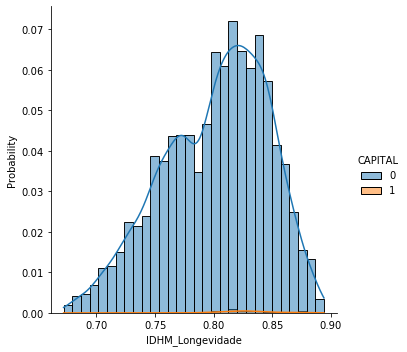

In [32]:
#ax = sns.distplot(dados_cidades, x="IDHM_Longevidade")

sns.displot(data=dados_cidades, x="IDHM_Longevidade", hue="CAPITAL", kde=True, stat='probability')

8- Cidades que tem mais estrangeiros são as que tem mais oportunidades de emprego?

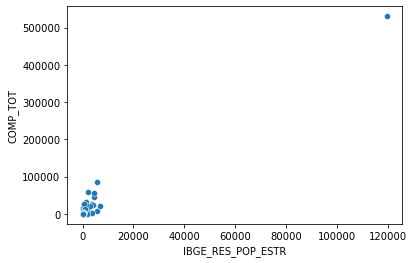

In [33]:
sns.scatterplot(data=dados_cidades, x="IBGE_RES_POP_ESTR", y="COMP_TOT")

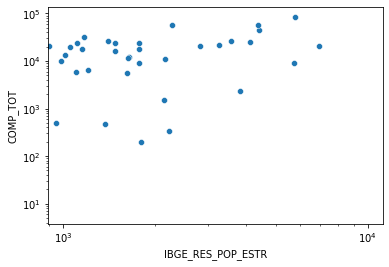

In [34]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], x="IBGE_RES_POP_ESTR", y="COMP_TOT")
plt.yscale("log")
plt.xscale("log")

9- Existe alguma relação entre cidades que possuem maior renda e assinam TV a cabo

In [35]:
dados_cidades['PAY_TV'].describe()

count      5368.00
mean       2369.45
std       30252.35
min           1.00
25%          90.00
50%         246.00
75%         783.25
max     2047668.00
Name: PAY_TV, dtype: float64

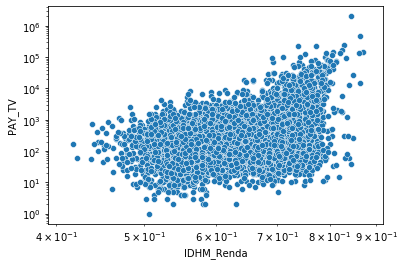

In [36]:
sns.scatterplot(data=dados_cidades, y="PAY_TV", x="IDHM_Renda")
plt.yscale("log")
plt.xscale("log")

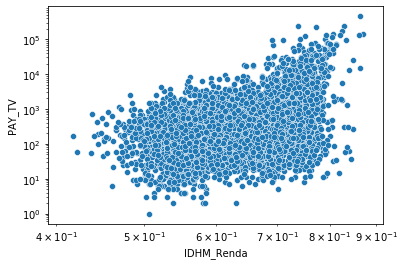

In [37]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], y="PAY_TV", x="IDHM_Renda")
plt.yscale("log")
plt.xscale("log")

In [38]:
aux = dados_cidades[dados_cidades['CITY'] != 'São Paulo']
aux[['IDHM_Renda', 'PAY_TV']].corr()

,IDHM_Renda,PAY_TV
IDHM_Renda,1.00,0.21
PAY_TV,0.21,1.00


10- Cidades com maior carga tributária são as que possuem maior IDH?

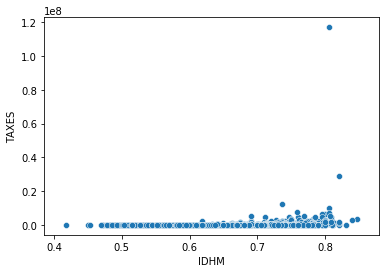

In [39]:
sns.scatterplot(data=dados_cidades, y="TAXES", x="IDHM")

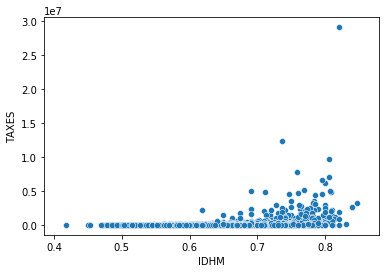

In [40]:
sns.scatterplot(data=dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo'], y="TAXES", x="IDHM")

11- As cidades que possuem mais hectares de plantação são também as que mais possuem número total de tratores de rodas?

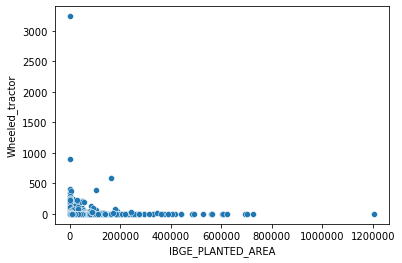

In [41]:
sns.scatterplot(data=dados_cidades, y="Wheeled_tractor", x="IBGE_PLANTED_AREA")
#É o oposto

12- Quais a 3 cidades que mais pagam impostos?

In [42]:
dados_cidades.nlargest(3,'TAXES')[['CITY', 'TAXES']]

,CITY,TAXES
4856,São Paulo,117125386.74
755,Brasília,29145585.42
2886,Manaus,12433232.22


13- Quais são as maiores cidades que não são capitais? Existem cidades que não são capitais e são maiores do que alguma capital?

In [43]:
dados_cidades.loc[dados_cidades['CAPITAL'] != 1].nlargest(5,'IBGE_RES_POP')[['CITY', 'IBGE_RES_POP']]

,CITY,IBGE_RES_POP
951,Campinas,1080113.00
4670,São Gonçalo,999728.00
1637,Duque De Caxias,855048.00
3332,Nova Iguaçu,796257.00
4599,São Bernardo Do Campo,765463.00


In [44]:
dados_cidades.loc[dados_cidades['CAPITAL'] == 1].nlargest(500,'IBGE_RES_POP')[['CITY', 'IBGE_RES_POP']].tail()

,CITY,IBGE_RES_POP
1812,Florianópolis,421240.00
2832,Macapá,398204.00
4193,Rio Branco,336038.00
642,Boa Vista,284313.00
3531,Palmas,228332.00


Sim, existem cidades que não são capitais e que são maiores que alguma capital. Um exemplo é Campinas e Florianópolis.

14- Quais estados que mais produzem safra (agricultura), elas possuem muita mão de obra estrangeira?

In [45]:
# agrupando por estados
dados_estados_sum = dados_cidades.groupby(['STATE']).sum()

In [46]:
dados_estados_sum['IBGE_RES_POP_ESTR'].mean()

11448.851851851852

In [47]:
dados_estados_sum.nlargest(10,'GVA_AGROPEC')[['GVA_AGROPEC', 'IBGE_RES_POP_ESTR']]

,GVA_AGROPEC,IBGE_RES_POP_ESTR
STATE,,
PR,31038394.40,19538.00
RS,30512205.76,17384.00
SP,30364219.18,180395.00
MG,27798564.49,10149.00
MT,22018684.51,3089.00
GO,16777610.12,5377.00
PA,14912877.30,3566.00
BA,13457196.93,8875.00
MS,13396656.03,8620.00


O estado de São Paulo concentra a maior parte dos estrangeiros

15- Curiosidade: Quais as cidades mais altas do brasil?

In [48]:
dados_cidades.nlargest(10, 'ALT')[['CITY', 'ALT']]

,CITY,ALT
1578,Divisa Nova,874579.00
4834,São Miguel Arcanjo,665758.00
1126,Carmésia,572655.00
3391,Nova Xavantina,271009.00
3442,Olho D'Água Grande,134461.00
1942,Governador Archer,132852.00
990,Campos Do Jordão,1639.15
4967,Senador Amaral,1495.64
698,Bom Repouso,1378.71
5411,Urupema,1345.42


In [49]:
#Bonus por estados
dados_estados_mean = dados_cidades.groupby(['STATE']).mean()

dados_estados_mean.nlargest(10, 'ALT')[['ALT']]

,ALT
STATE,
MG,2392.35
MT,2247.61
SP,1638.08
AL,1516.54
DF,1115.25
MA,725.12
GO,653.69
PR,590.20
SC,451.72


16- Existe alguma diferença significativa entre cidades com populações mais jovens e mais velhas?

In [50]:
# O que define cidade mais velha?
dados_cidades['%60anos+'] = (dados_cidades['IBGE_60+'] / dados_cidades['IBGE_POP']) * 100

In [51]:
dados_cidades['%60anos+'].describe()
#vamos considerar cidades mais velhas como as que tem mais de 12% de população com mais de 60 anos

count   5368.00
mean      12.02
std        3.35
min        2.25
25%        9.83
50%       11.92
75%       14.10
max       42.20
Name: %60anos+, dtype: float64

In [52]:
dados_cidades.loc[dados_cidades['%60anos+'] >= 12, 'CIDADE_VELHA'] = 1
dados_cidades.loc[dados_cidades['%60anos+'] < 12, 'CIDADE_VELHA'] = 0

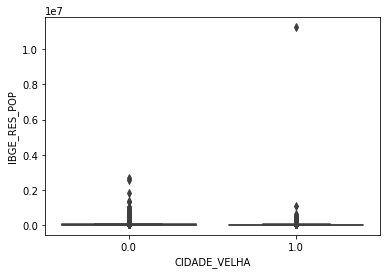

In [53]:
ax = sns.boxplot(x="CIDADE_VELHA", y="IBGE_RES_POP", data=dados_cidades)

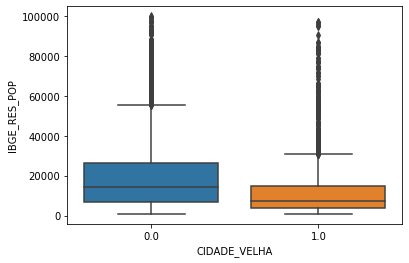

In [54]:
#Vamos considerar cidades com menos de 100 mil para a visualização
ax = sns.boxplot(x="CIDADE_VELHA", y="IBGE_RES_POP", data=dados_cidades.loc[dados_cidades['IBGE_RES_POP'] < 100000])
#Cidades mais velhas tem população menor

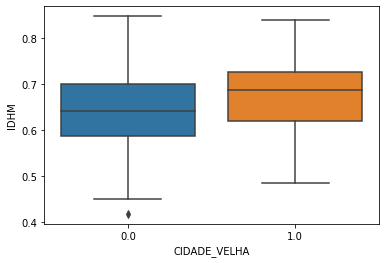

In [55]:
ax = sns.boxplot(x="CIDADE_VELHA", y="IDHM", data=dados_cidades)
#Cidades mais velhas tem IDH maior

17- Qual cidade com a maior taxa de veículos/habitantes? Esse dado pode ter alguma relação com outro dado disponibilizado?

In [56]:
dados_cidades['veiculos/habitantes'] = (dados_cidades['Cars'] + dados_cidades['Motorcycles'] + dados_cidades['Wheeled_tractor']) / dados_cidades['IBGE_RES_POP']

In [57]:
dados_cidades[dados_cidades['veiculos/habitantes']==dados_cidades['veiculos/habitantes'].max()]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDH_BOM,%60anos+,CIDADE_VELHA,veiculos/habitantes
688,Bom Jesus Do Norte,ES,0,9476.00,9472.00,4.00,3178.00,2944.00,234.00,8642.00,...,4328.00,5.00,0.00,0.00,0.00,1.00,0.00,13.70,1.00,1.13


In [58]:
correlacao = dados_cidades.corr()[['veiculos/habitantes']]

In [59]:
correlacao.loc[(correlacao['veiculos/habitantes'] > 0.3) | (correlacao['veiculos/habitantes'] < -0.3)]

,veiculos/habitantes
IDHM Ranking 2010,-0.84
IDHM,0.84
IDHM_Renda,0.85
IDHM_Longevidade,0.73
IDHM_Educacao,0.75
LONG,-0.41
LAT,-0.72
GDP_CAPITA,0.45
Pu_Bank,0.37
IDH_BOM,0.46


In [60]:
#Existe correlação com IDH e localização

18- Qual a cidade com menos habitantes que possui Uber?

In [61]:
cidades_uber = dados_cidades[dados_cidades['UBER'] > 0]
cidades_sem_uber = dados_cidades[dados_cidades['UBER'] == 0]
cidades_uber[cidades_uber['IBGE_RES_POP'] == cidades_uber['IBGE_RES_POP'].min()]

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES,IDH_BOM,%60anos+,CIDADE_VELHA,veiculos/habitantes
2583,Joaçaba,SC,0,27020.00,26999.00,21.00,9080.00,8446.00,634.00,15350.00,...,5263.00,39.00,1.00,0.00,0.00,2.00,1.00,12.96,1.00,0.70


19- Qual a quantidade de cidades que possuem mais motos do que carro?

In [62]:
dados_cidades[dados_cidades['Motorcycles'] > dados_cidades['Cars']]['CITY'].count()

2364

20- Podemos afirmar com confiança que cidades que possuem uber são cidades com uma área maior?

In [63]:
import statsmodels.stats.api as sms

intervalo_uber = sms.DescrStatsW(cidades_uber['AREA']).tconfint_mean(alpha = 0.05)
intervalo_sem_uber = sms.DescrStatsW(cidades_sem_uber['AREA']).tconfint_mean(alpha = 0.05)
print(f'Intervalo de confiança cidades com Uber: {intervalo_uber}')
print(f'Intervalo de confiança cidades sem Uber: {intervalo_sem_uber}')

Intervalo de confiança cidades com Uber: (1593.905262040819, 3136.1287730469003)
Intervalo de confiança cidades sem Uber: (1380.7936210629737, 1688.1820508060787)


In [64]:
from scipy import stats

alpha = 0.05
stat, p = stats.ttest_ind(cidades_uber['AREA'], cidades_sem_uber['AREA'])
if p < alpha: # hipótese nula: As médias são iguais
 print("A hipotese de os dois conjuntos terem médias iguais pode ser rejeitada, ou seja, são diferentes")
else:
 print("A hipotese de os dois conjuntos terem médias iguais não pode ser rejeitada, ou seja, são iguais")


A hipotese de os dois conjuntos terem médias iguais não pode ser rejeitada, ou seja, são iguais


# Análise Preditiva

In [69]:
dados_cidades.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5368 entries, 0 to 5572
Data columns (total 85 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5368 non-null   object 
 1   STATE                   5368 non-null   object 
 2   CAPITAL                 5368 non-null   int64  
 3   IBGE_RES_POP            5368 non-null   float64
 4   IBGE_RES_POP_BRAS       5368 non-null   float64
 5   IBGE_RES_POP_ESTR       5368 non-null   float64
 6   IBGE_DU                 5368 non-null   float64
 7   IBGE_DU_URBAN           5368 non-null   float64
 8   IBGE_DU_RURAL           5368 non-null   float64
 9   IBGE_POP                5368 non-null   float64
 10  IBGE_1                  5368 non-null   float64
 11  IBGE_1-4                5368 non-null   float64
 12  IBGE_5-9                5368 non-null   float64
 13  IBGE_10-14              5368 non-null   float64
 14  IBGE_15-59              5368 non-null   

* Removendo colunas com atributos não valores - facilitando o agrupamento

In [133]:
dados_clusterizacao2 = dados_cidades.loc[dados_cidades['CITY'] != 'São Paulo']

In [135]:
# dados_clusterizacao2 = dados_clusterizacao2.drop(columns=['CITY', 'STATE', 'IDHM Ranking 2010', 'IDHM', 'IDHM_Renda', 
#                                                 'IDHM_Longevidade', 'IDHM_Educacao', 'ALT', 'REGIAO_TUR', 'CATEGORIA_TUR', 
#                                                 'RURAL_URBAN', 'GVA_MAIN', 'CAPITAL'])

dados_clusterizacao2 = dados_clusterizacao2[['IBGE_RES_POP', 'IBGE_RES_POP_ESTR', 'IBGE_DU_URBAN', 'PAY_TV', 'COMP_TOT',
                                            'TAXES', 'GDP', 'GDP_CAPITA', 'MUN_EXPENDIT']]

In [136]:
dados_clusterizacao2

,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_URBAN,PAY_TV,COMP_TOT,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT
0,6876.00,0.00,1546.00,360.00,284.00,20554.20,166.41,20664.57,28227691.00
1,6704.00,0.00,1481.00,77.00,476.00,12873.50,180.09,25591.70,17909274.00
2,15757.00,148.00,3233.00,227.00,288.00,26822.58,287984.49,15628.40,37513019.00
3,22690.00,0.00,6667.00,1230.00,621.00,26994.09,430235.36,18250.42,27460018.00
4,141100.00,60.00,19057.00,3389.00,931.00,95180.48,1249255.29,8222.36,27460018.00
...,...,...,...,...,...,...,...,...,...
5567,40573.00,8.00,8902.00,2567.00,769.00,174113.07,1156079.37,26768.53,101621324.00
5568,45536.00,0.00,8461.00,169.00,420.00,13330.49,342261.06,7089.97,27460018.00
5570,2335.00,0.00,638.00,155.00,111.00,1988.33,75934.89,29149.67,17866486.00
5571,50173.00,21.00,7611.00,6493.00,470.00,22610.35,380509.30,7489.46,77454982.00


In [137]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados_clusterizacao2.values)

kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

y_pred = kmeans.fit_predict(dados_clusterizacao2)


dados_clusterizacao2['predict'] = y_pred


dados_clusterizacao2

<ipython-input-137-e88c04c468b5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_clusterizacao2['predict'] = y_pred


,IBGE_RES_POP,IBGE_RES_POP_ESTR,IBGE_DU_URBAN,PAY_TV,COMP_TOT,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT,predict
0,6876.00,0.00,1546.00,360.00,284.00,20554.20,166.41,20664.57,28227691.00,0
1,6704.00,0.00,1481.00,77.00,476.00,12873.50,180.09,25591.70,17909274.00,0
2,15757.00,148.00,3233.00,227.00,288.00,26822.58,287984.49,15628.40,37513019.00,0
3,22690.00,0.00,6667.00,1230.00,621.00,26994.09,430235.36,18250.42,27460018.00,0
4,141100.00,60.00,19057.00,3389.00,931.00,95180.48,1249255.29,8222.36,27460018.00,0
...,...,...,...,...,...,...,...,...,...,...
5567,40573.00,8.00,8902.00,2567.00,769.00,174113.07,1156079.37,26768.53,101621324.00,0
5568,45536.00,0.00,8461.00,169.00,420.00,13330.49,342261.06,7089.97,27460018.00,0
5570,2335.00,0.00,638.00,155.00,111.00,1988.33,75934.89,29149.67,17866486.00,0
5571,50173.00,21.00,7611.00,6493.00,470.00,22610.35,380509.30,7489.46,77454982.00,0


In [138]:
dados_clusterizacao2['predict'].value_counts()

0    4973
4     304
2      67
1      18
3       5
Name: predict, dtype: int64

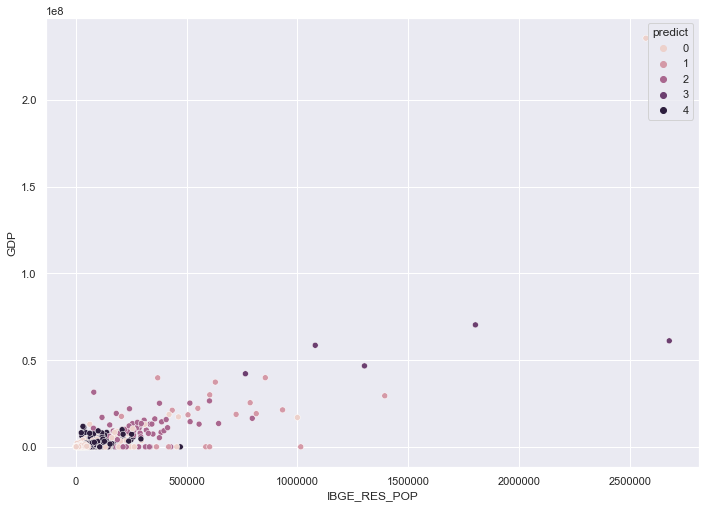

In [139]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=dados_clusterizacao2, x="IBGE_RES_POP", y="GDP", hue="predict")

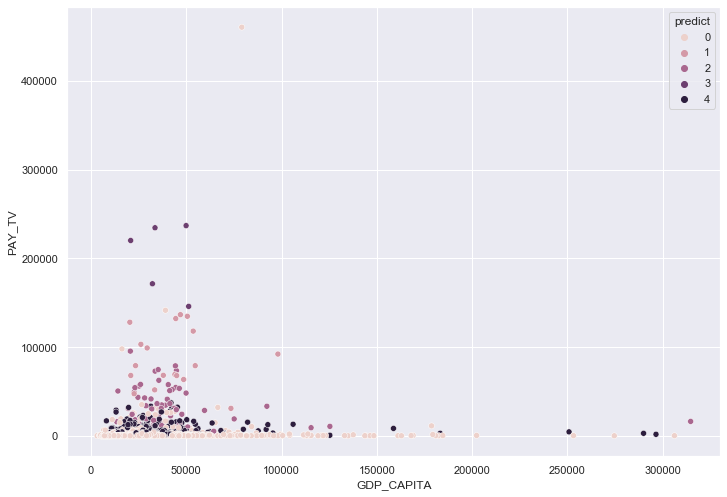

In [140]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=dados_clusterizacao2, x="GDP_CAPITA", y="PAY_TV", hue="predict")

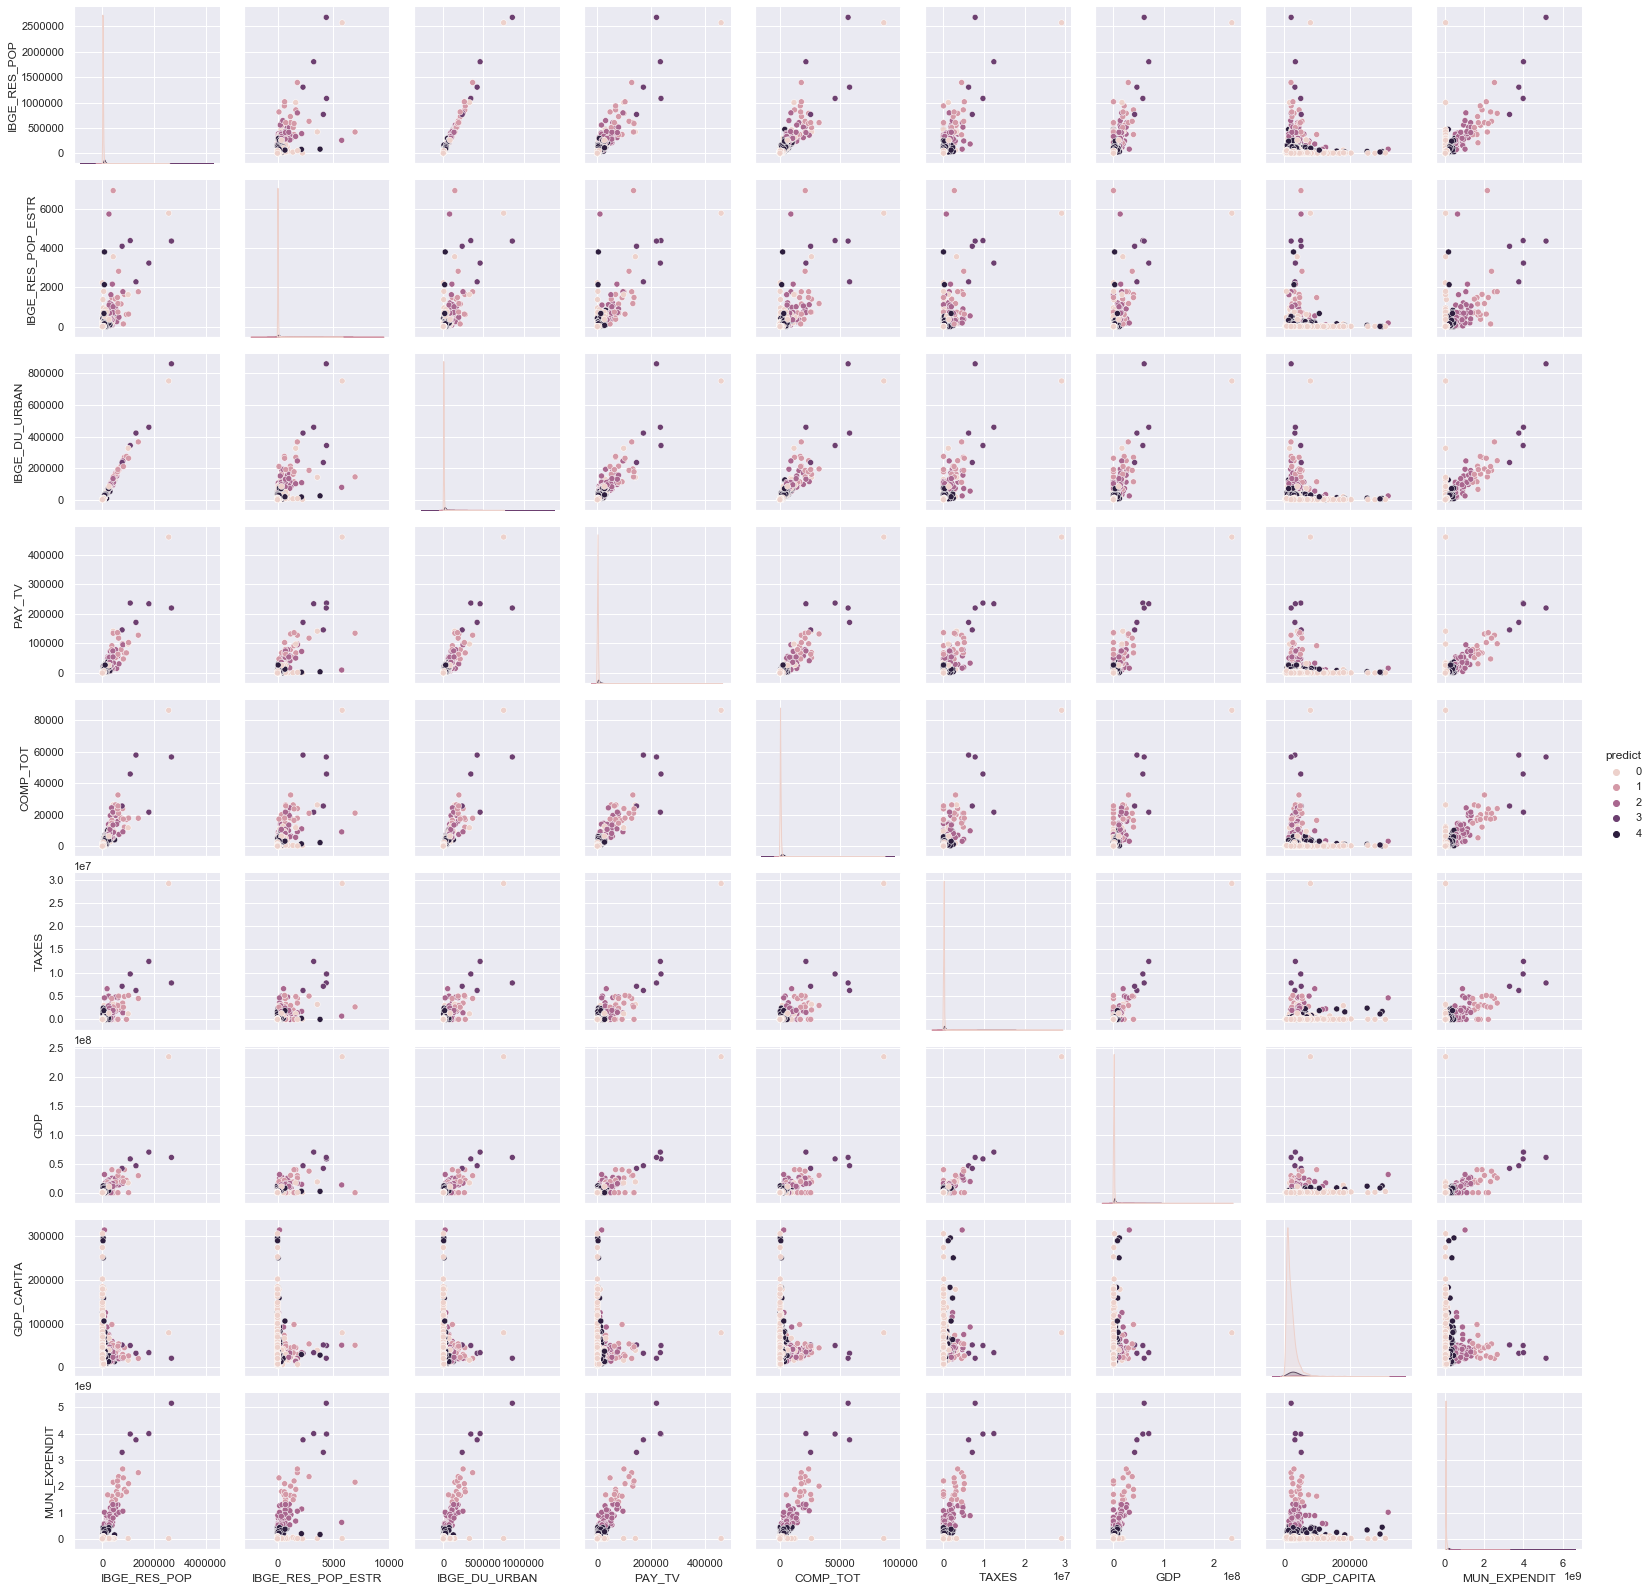

In [141]:
sns.pairplot(dados_clusterizacao2, hue='predict')
plt.show()

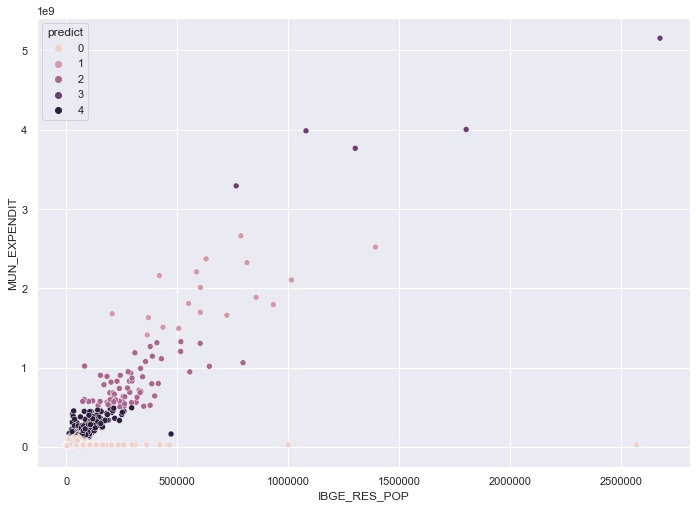

In [142]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=dados_clusterizacao2, x="IBGE_RES_POP", y="MUN_EXPENDIT", hue="predict")